# Unweighted and Weighted Means

In [1]:
import numpy as np
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpathces

# from matplotlib.pyplot import figure, show
# from matplotlib.ticker import MaxNLocator

## Maximum Likelihood Estimator motivated "derivations"

### Unweighted Means

If we make $n$ idential statistically independent (isi) measurments of a random varaible $x$, such that the measurements collected form data $\vec{x} = \left\{x_i, \cdots, x_n\right\}$, from a Gaussian (Normal) distribution,

\begin{equation}
L\left(\vec{x}; \vec{\theta}\right) = \prod_{i=1}^{n} f(x_i; \mu, \sigma) = \frac{1}{(2\pi)^{n/2} \sigma^{n}} \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^{n} \left(x_i - \mu\right)^2 \right)
\end{equation}

then

\begin{equation}
-\ln L = \frac{n}{2} \ln\left(2\pi\right) + n \ln \sigma + \frac{1}{2\sigma^2} \sum_{i=1}^{n}\left(x_i - \mu\right)^2
\end{equation}

and so $L$ is maximized with respect to a variable $\alpha$ when $-\ln L$ is minimized,

\begin{equation*}
\frac{\partial \left(-\ln L\right)}{\partial \alpha} = 0.
\end{equation*}

Thus, $L$ is maximized when

\begin{equation*}
\frac{\partial \left(-\ln L\right)}{\partial \mu} = -\frac{1}{\sigma^2} \sum_{i=1}^{n}\left(x_i - \mu\right) = 0,
\end{equation*}

which occurs for

\begin{equation*}
\sum_{i=1}^{n} x_i = n \mu,
\end{equation*}

such that the best estimate for true parameter $\mu$ is

\begin{equation}
\boxed{\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i = \bar{x}\,}\,,
\end{equation}

and $L$ is maximized when

\begin{equation*}
\frac{\partial \left(-\ln L\right)}{\partial \sigma} = \frac{n}{\sigma} - \frac{1}{\sigma^3} \sum_{i=1}^{n} \left(x_i - \mu\right) = 0,
\end{equation*}

which occurs for

\begin{equation*}
n\sigma^2 = \sum_{i=1}^{n} \left(x_i - \mu\right)^2,
\end{equation*}

which is

\begin{equation*}
\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n} \left(x_i - \mu\right)^2}.
\end{equation*}

However, $\mu$ is an unknown true parameter, and the best estimate of it is $\hat{\mu}$, which is in no
manner required to be equal to $\mu$. Thus, the best estimate of $\sigma$ is

\begin{equation}
\boxed{\hat{\sigma}_{\hat{\mu}} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} \left(x_i - \hat{\mu}\right)^2} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} \left(x_i - \bar{x}\,\right)^2}\,}\,.
\end{equation}

If the seperation from the mean of each observation, $\left(x_i - \bar{x}\right) = \delta x = \text{constant}$, are the same then the uncertainity on the mean is found to be

\begin{equation*}
\sigma_{\hat{\mu}} = \frac{\delta x}{\sqrt{n}},
\end{equation*}

which is often refered to as the "standard error".

---
So, for a population of measurements sampled from a distribution, it can be said that the sample mean is
$$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i = \bar{x},$$

and the standard deviation of the sample is

\begin{equation*}
\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n} \left(x_i - \bar{x}\,\right)^2}.
\end{equation*}

---

### Weighted Means

Assume that $n$ individual measurments $x_i$ are spread around (unknown) true value $\theta$ according to a Gaussian distribution, each with known width $\sigma_i$.

This then leads to the likelihood function

\begin{equation*}
L(\theta) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}\sigma_i} \exp\left(-\frac{\left(x_i - \theta\right)^2}{2\sigma_i^2} \right)
\end{equation*}

and so negative log-likelihood

\begin{equation}
-\ln L = \frac{1}{2} \ln\left(2\pi\right) + \ln \sigma_i + \frac{1}{2\sigma_i^2} \sum_{i=1}^{n}\left(x_i - \theta\right)^2.
\end{equation}

As before, $L$ is maximized with respect to a variable $\alpha$ when $-\ln L$ is minimized,

\begin{equation*}
\frac{\partial \left(-\ln L\right)}{\partial \alpha} = 0,
\end{equation*}

and so $L$ is maximized with respect to $\theta$ when

\begin{equation*}
\frac{\partial \left(-\ln L\right)}{\partial \theta} = -\sum_{i=1}^{n} \frac{x_i - \theta}{\sigma_i^2} = 0,
\end{equation*}

which occurs for

\begin{equation*}
\sum_{i=1}^{n} \frac{x_i}{\sigma_i^2} = \theta \sum_{i=1}^{n} \frac{1}{\sigma_i^2},
\end{equation*}

which is

\begin{equation}
\hat{\theta} = \frac{\displaystyle\sum_{i=1}^{n} \frac{x_i}{\sigma_i^2}}{\displaystyle\sum_{i=1}^{n}\frac{1}{\sigma_i^2}}.
\end{equation}

Note that by defining "weights" to be

\begin{equation*}
w_i = \frac{1}{\sigma_1^2},
\end{equation*}

this can be expressed as

\begin{equation}
\boxed{\hat{\theta} = \frac{\displaystyle\sum_{i=1}^{n} w_i\, x_i}{\displaystyle\sum_{i=1}^{n}w_i}},
\end{equation}

making the term "weighted mean" very transparent.

To find the standard deviation on the weighted mean, we first look to the variance, $\sigma^2$. [4]

\begin{align*}
\sigma^2 &= \text{E}\left[\left(\hat{\theta} - \text{E}\left[\hat{\theta}\right]\right)^2\right] \\
    &= \text{E}\left[\left(\frac{\displaystyle\sum_{i=1}^{n} w_i\, x_i}{\displaystyle\sum_{i=1}^{n}w_i} - \text{E}\left[\frac{\displaystyle\sum_{i=1}^{n} w_i\, x_i}{\displaystyle\sum_{i=1}^{n}w_i}\right]\,\right)^2\right] \\
    &= \frac{1}{\displaystyle\left(\sum_{i=1}^{n} w_i\right)^2} \text{E} \left[ \displaystyle\left(\sum_{i=1}^{n} w_i\,x_i\right)^2 - 2 \displaystyle\left(\sum_{i=1}^{n} w_i\,x_i\right) \displaystyle\left(\sum_{i=j}^{n} w_j\, \text{E}\left[x_j\right]\right) + \displaystyle\left(\sum_{i=1}^{n} w_i\, \text{E}\left[x_i\right]\right)^2 \right] \\
    &= \frac{1}{\displaystyle\left(\sum_{i=1}^{n} w_i\right)^2} \text{E} \left[ \sum_{i,j}^{n} w_i\, x_i w_j\, x_j - 2 \sum_{i,j}^{n} w_i\, x_i w_j\, \text{E}\left[x_j\right] + \sum_{i,j}^{n} w_i\, \text{E}\left[x_i\right] w_j\, \text{E}\left[x_j\right] \right] \\
    &= \frac{1}{\displaystyle\left(\sum_{i=1}^{n} w_i\right)^2} \sum_{i,j}^{n} w_i w_j \left( \text{E}\left[ x_i x_j \right] - 2 \text{E}\left[ x_i \right]\text{E}\left[ x_j \right] + \text{E}\left[ x_i \right]\text{E}\left[ x_j \right] \right) \\
    &= \frac{1}{\displaystyle\left(\sum_{i=1}^{n} w_i\right)^2} \sum_{i,j}^{n} w_i w_j \left( \text{E}\left[ x_i x_j \right] - \text{E}\left[ x_i \right]\text{E}\left[ x_j \right] \right) \\
    &= \frac{1}{\displaystyle\left(\sum_{i=1}^{n} w_i\right)^2} \sum_{i,j}^{n} w_i w_j \,\text{Cov}\left( x_i, x_j \right) = \left\{
\begin{array}{ll}
\frac{\displaystyle1}{\displaystyle\left(\sum_{i=1}^{n} w_i\right)^2} \displaystyle\sum_{i}^{n} \left( w_i \sigma_i \right)^2\,, & x_i \text{ and } x_j \text{ statistically independent}, \\
0\,, &\text{ otherwise},
\end{array}
\right. \\
    &= \frac{\displaystyle\sum_{i}^{n} \left( \sigma_i^{-2} \sigma_i \right)^2}{\displaystyle\left(\sum_{i=1}^{n} w_i\right)^2} = \frac{\displaystyle\sum_{i}^{n} w_i}{\displaystyle\left(\sum_{i=1}^{n} w_i\right)^2} \\
    &= \frac{\displaystyle 1}{\displaystyle\sum_{i=1}^{n} w_i}
\end{align*}

Thus, it is seen that the standard deviation on the weighted mean is

\begin{equation}
\boxed{\sigma_{\hat{\theta}} = \sqrt{\frac{\displaystyle 1}{\displaystyle\sum_{i=1}^{n} w_i}} = \left(\displaystyle\sum_{i=1}^{n} \frac{1}{\sigma_i^2}\right)^{-1/2}}\,.
\end{equation}

Notice that in the event that the uncertainties are uniform for each observation, $\sigma_i = \delta x$, the above yields the same result as the unweighted mean. $\checkmark$

After this aside it is worth pointing out that [1] have a very elegant demonstration that

\begin{equation*}
\sigma_{\hat{\theta}} = \left(\frac{\partial^2\left(- \ln L\right)}{\partial\, \theta^2}\right)^{-1/2} = \left(\displaystyle\sum_{i=1}^{n} \frac{1}{\sigma_i^2}\right)^{-1/2}.
\end{equation*}

---
So, the average of $n$ measurements of quantity $\theta$, with individual measurments, $x_i$, Gaussianly distributed about (unknown) true value $\theta$ with known width $\sigma_i$, is the weighted mean

\begin{equation*}
\hat{\theta} = \frac{\displaystyle\sum_{i=1}^{n} w_i\, x_i}{\displaystyle\sum_{i=1}^{n}w_i},
\end{equation*}

with weights $w_i = \sigma_i^{-2}$, with standard deviation on the weighted mean

\begin{equation*}
\sigma_{\hat{\theta}} = \sqrt{\frac{\displaystyle 1}{\displaystyle\sum_{i=1}^{n} w_i}} = \left(\displaystyle\sum_{i=1}^{n} \frac{1}{\sigma_i^2}\right)^{-1/2}.
\end{equation*}

---

## Specific Examples

Given the measurments

\begin{equation*}
\vec{x} = \left\{10, 9, 11\right\}
\end{equation*}

with uncertanties
$$\vec{\sigma_x} = \left\{1, 2, 3\right\}$$

In [2]:
x_data = [10, 9, 11]
x_uncertainty = [1, 2, 3]

In [3]:
numerator = sum(x / (sigma_x ** 2) for x, sigma_x in zip(x_data, x_uncertainty))
denominator = sum(1 / (sigma_x ** 2) for sigma_x in x_uncertainty)

print("hand calculated weighted mean: {}".format(numerator / denominator))

hand calculated weighted mean: 9.897959183673468


Using [NumPy's `average` method](https://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html)

In [4]:
# unweighted mean
np.average(x_data)

10.0

In [5]:
x_weights = [1 / (uncert ** 2) for uncert in x_uncertainty]
# weighted mean
weighted_mean = np.average(x_data, weights=x_weights)
print(weighted_mean)

9.897959183673468


In [6]:
# no method to do this in NumPy!?
sigma = np.sqrt(1 / np.sum(x_weights))
print("hand calculated uncertaintiy on weighted mean: {}".format(sigma))

hand calculated uncertaintiy on weighted mean: 0.8571428571428571


In [7]:
# A second way to find the uncertainty on the weighted mean
summand = sum((x * w) for x, w in zip(x_data, x_weights))
np.sqrt(np.average(x_data, weights=x_weights) / summand)

0.8571428571428571

Let's plot the data now and take a look at the results

In [8]:
def draw_weighted_mean(data, errors, w_mean, w_uncert):
    plt.figure(1)

    # the data to be plotted
    x = [i + 1 for i in range(len(data))]

    x_min = x[x.index(min(x))]
    x_max = x[x.index(max(x))]

    y = data
    y_min = y[y.index(min(y))]
    y_max = y[y.index(max(y))]

    err_max = errors[errors.index(max(errors))]

    # plot data
    plt.errorbar(x, y, xerr=0, yerr=errors, fmt="o", color="black")
    # plot weighted mean
    plt.plot((x_min, x_max), (w_mean, w_mean), color="blue")
    # plot uncertainty on weighted mean
    plt.plot(
        (x_min, x_max),
        (w_mean - w_uncert, w_mean - w_uncert),
        color="gray",
        linestyle="--",
    )
    plt.plot(
        (x_min, x_max),
        (w_mean + w_uncert, w_mean + w_uncert),
        color="gray",
        linestyle="--",
    )

    # Axes
    plt.xlabel("Individual measurements")
    plt.ylabel("Value of measruement")
    # view range
    epsilon = 0.1
    plt.xlim(x_min - epsilon, x_max + epsilon)
    plt.ylim([y_min - err_max, 1.5 * y_max + err_max])

    # ax = figure().gca()
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Legends
    wmean_patch = mpathces.Patch(
        color="blue", label="Weighted mean: $\mu={:0.3f}$".format(w_mean)
    )
    uncert_patch = mpathces.Patch(
        color="gray",
        label="Uncertainty on the weighted mean: $\pm{:0.3f}$".format(w_uncert),
    )
    plt.legend(handles=[wmean_patch, uncert_patch])

    plt.show()

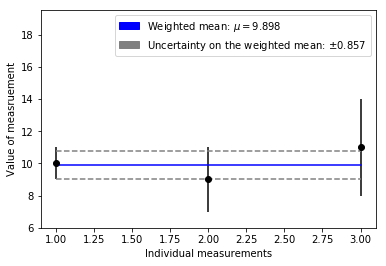

In [9]:
draw_weighted_mean(x_data, x_uncertainty, weighted_mean, sigma)

Now let's do this again but with data that are Normally distributed about a mean value

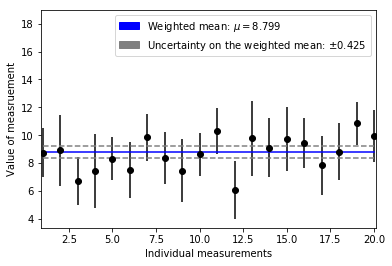

In [10]:
true_mu = np.random.uniform(3, 9)
true_sigma = np.random.uniform(0.1, 2.0)
n_samples = 20

samples = np.random.normal(true_mu, true_sigma, n_samples).tolist()
gauss_errs = np.random.normal(2, 0.4, n_samples).tolist()

weights = [1 / (uncert ** 2) for uncert in gauss_errs]

draw_weighted_mean(
    samples,
    gauss_errs,
    np.average(samples, weights=weights),
    np.sqrt(1 / np.sum(weights)),
)

## References

1. [_Data Analysis in High Energy Physics_](http://eu.wiley.com/WileyCDA/WileyTitle/productCd-3527410589.html), Behnke et al., 2013, $\S$ 2.3.3.1
2. [_Statistical Data Analysis_](http://www.pp.rhul.ac.uk/~cowan/sda/), Glen Cowan, 1998
3. University of Marlyand, Physics 261, [Notes on Error Propagation](http://www.physics.umd.edu/courses/Phys261/F06/ErrorPropagation.pdf)
4. Physics Stack Exchange, [_How do you find the uncertainty of a weighted average?_](https://physics.stackexchange.com/questions/15197/how-do-you-find-the-uncertainty-of-a-weighted-average)